# Efficient Coding Demonstrations

Part One: Collecting the natural patches based on input type (grayscale, color, video/sound???) for the algorithm
    
    A. Grayscale Images
    B. Colored Images
    ....
    
Part Two: Running the ICA algorithm

Part Three: Examples vs. Non-examples

In [1]:
# packages used among several sections

import PIL.Image
import numpy as np
import pylab as py
import cv2
from PIL import Image
import sklearn.decomposition

# Part One: Collecting the natural patches based on input type

#  A. Grayscale Images

In [3]:
def collect_natural_patches(num_patches = 100000, patch_width = 8):
  """ collects image patches
  the natural images are from a specific folder of 13 .tiff files"""

  max_tries = num_patches * 50
  image_width = 200
  
  img_first_patch = 0 # the first patch number accepted from an image
  img_first_try = 0 # the first attempt to take a patch from the image
  patch_cnt = 0 # number of collected patches
  try_cnt = 0 # number of attempted collected patches
  num_pixels = patch_width * patch_width

  patch_sample = np.zeros([patch_width,patch_width],float)
  patch = np.zeros([num_pixels,1],float)
  
  img_patches = np.zeros([num_pixels,num_patches],float)

  # change the image sampled from
  nat_img_cnt = 1  
  image = PIL.Image.open('natural_images_grayscale/' + str(nat_img_cnt) + '.tiff')
  image = np.asarray(image, 'double').transpose()  

  # normalizing the image
  image -= image.mean()
  image /= image.std()
      
  # collect the patches
  while patch_cnt < num_patches and try_cnt < max_tries:
    try_cnt += 1  # number of total patches attempted

    if (try_cnt - img_first_try) > max_tries/13 or \
      (patch_cnt - img_first_patch) > num_patches/13:
      # change the image sampled from
      nat_img_cnt += 1
      image = PIL.Image.open('natural_images_grayscale/' + str(nat_img_cnt) + '.tiff')
      image = np.asarray(image, 'double').transpose()        
      # normalizing the image
      image -= image.mean()
      image /= image.std()
      
      img_first_patch = patch_cnt
      img_first_try = try_cnt
    
      # update on every switch of images
      print (int(100 * float(patch_cnt)/num_patches),' percent complete')
    
    px = np.random.randint(0,image_width - patch_width)
    py = np.random.randint(0,image_width - patch_width)
        
    patch_sample = image[px:px+patch_width,py:py+patch_width].copy()
    patch_std = patch_sample.std()
    
    if patch_std > 0.0: # > 0 to remove blank/uninteresting patches for speed
      # create the patch vector     
      patch = np.reshape(patch_sample, num_pixels)     
      patch = patch - np.mean(patch)         
      img_patches[:,patch_cnt] = patch.copy()
      patch_cnt += 1
  return img_patches
        
patches_mat = collect_natural_patches(num_patches = 100000, patch_width = 8)
print('\nshape of the extracted image patch data:', patches_mat.shape)

7  percent complete
15  percent complete
23  percent complete
30  percent complete
38  percent complete
46  percent complete
53  percent complete
61  percent complete
69  percent complete
76  percent complete
84  percent complete
92  percent complete

shape of the extracted image patch data: (64, 100000)


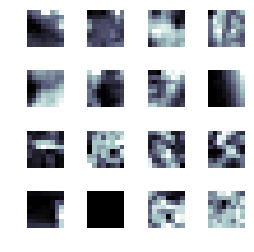

In [5]:
def show_patches_mat(pre_patches, show_patch_num = 16, display=True):
  """ this function generates a 2D array to display image patches (assuming square) """
  
  patches = pre_patches
    
  tot_patches = patches.shape[1]
  data_dim = patches.shape[0]
  patch_width = int(np.round(np.sqrt(data_dim)))
  
  # extract show_patch_num patches
  disp_patch = np.zeros([data_dim, show_patch_num], float)
  for i in range(0,show_patch_num):
    patch_i = i * tot_patches // show_patch_num
  
    patch = patches[:,patch_i].copy()
    pmax  = patch.max()
    pmin = patch.min()
    # fix patch range from min to max to 0 to 1
    if pmax > pmin: 
      patch = (patch - pmin) / (pmax - pmin)
    disp_patch[:,i] = patch.copy()

  bw = 5    # border width
  pw = patch_width
  
  patches_y = int(np.sqrt(show_patch_num))
  patches_x = int(np.ceil(float(show_patch_num) / patches_y))
  patch_img = disp_patch.max() * np.ones([(pw + bw) * patches_x - bw,
    patches_y * (pw + bw) - bw], float)
  for i in range(0,show_patch_num): 
    y_i = i // patches_y
    x_i = i % patches_y

    reshaped = disp_patch[:,i].reshape((pw,pw))
    full_patch = np.zeros([pw, pw], float)
    full_patch[0:pw,:] = reshaped[:,:].copy()
    patch_img[x_i*(pw+bw):x_i*(pw+bw)+pw,y_i*(pw+bw):y_i*(pw+bw)+pw] = full_patch
  
  if display:
    py.bone()
    py.imshow(patch_img.T, interpolation='nearest')
    py.axis('off')
  return

show_patches_mat(patches_mat)

#  B. Colored Images

In [8]:
def collect_natural_patches(num_patches = 100000, patch_width = 8):
  """ collects image patches
  the natural images are from a specific folder of 13 .tiff files"""

  max_tries = num_patches * 50
  image_width = 200
  
  img_first_patch = 0 # the first patch number accepted from an image
  img_first_try = 0 # the first attempt to take a patch from the image
  patch_cnt = 0 # number of collected patches
  try_cnt = 0 # number of attempted collected patches
  num_pixels = 3 * patch_width * patch_width

  patch_sample = np.zeros([3,patch_width,patch_width],float)
  patch = np.zeros([num_pixels],float)
  
  img_patches = np.zeros([num_pixels,num_patches],float)

  # change the image sampled from
  nat_img_cnt = 1  
  image = PIL.Image.open('natural_color/' + str(nat_img_cnt) + '.tiff')
  image = np.asarray(image, 'double').transpose() 
  image = image[0:3,:,:]
  # normalizing the image
  image -= image.mean()
  image /= image.std()
  
  
  # collect the patches
  while patch_cnt < num_patches and try_cnt < max_tries:
    try_cnt += 1  # number of total patches attempted

    if (try_cnt - img_first_try) > max_tries/5 or \
      (patch_cnt - img_first_patch) > num_patches/5:
      # change the image sampled from
      nat_img_cnt += 1
      image = PIL.Image.open('natural_color/' + str(nat_img_cnt) + '.tiff')
      
      image = np.asarray(image, 'double').transpose() 
      image = image[0:3,:,:]
      
      
      
      image -= image.mean()
      image /= image.std()
      
      img_first_patch = patch_cnt
      img_first_try = try_cnt
    
      # update on every switch of images
      print (int(100 * float(patch_cnt)/num_patches),' percent complete')
    
    px = np.random.randint(0,image_width - patch_width)
    py = np.random.randint(0,image_width - patch_width)
        
    patch_sample = image[:,px:px+patch_width,py:py+patch_width].copy()
    
    patch_std = patch_sample.std()
    
    if patch_std > 0.0: # > 0 to remove blank/uninteresting patches for speed
      # create the patch vector     
      patch = np.reshape(patch_sample, num_pixels)   
      patch = patch - np.mean(patch)         
      img_patches[:,patch_cnt] = patch.copy()
      patch_cnt += 1
  return img_patches
        
patches_mat = collect_natural_patches(num_patches = 1000, patch_width = 8)
print('\nshape of the extracted image patch data:', patches_mat.shape)

20  percent complete
40  percent complete
60  percent complete
80  percent complete

shape of the extracted image patch data: (192, 1000)


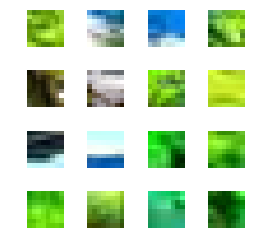

In [13]:
def show_patches_mat(pre_patches, show_patch_num = 16, display=True):
  """ this function generates a 2D array to display image patches (assuming square) """
  
  patches = pre_patches
    
  tot_patches = patches.shape[1]
  data_dim = patches.shape[0]
  patch_width = 8
  
  # extract show_patch_num patches
  disp_patch = np.zeros([data_dim, show_patch_num], float)
  for i in range(0,show_patch_num):
    patch_i = i * tot_patches // show_patch_num
  
    patch = patches[:,patch_i].copy()
    pmax  = patch.max()
    pmin = patch.min()
    # fix patch range from min to max to 0 to 1
    if pmax > pmin: 
      patch = (patch - pmin) / (pmax - pmin)
    disp_patch[:,i] = patch.copy()

  bw = 5    # border width
  pw = patch_width
  
  patches_y = int(np.sqrt(show_patch_num))
  patches_x = int(np.ceil(float(show_patch_num) / patches_y))
  patch_img = disp_patch.max() * np.ones([3,(pw + bw) * patches_x - bw,
    patches_y * (pw + bw) - bw], float)
  for i in range(0,show_patch_num): 
    y_i = i // patches_y
    x_i = i % patches_y

    reshaped = disp_patch[:,i].reshape((3,8,8))
    full_patch = np.zeros([3, pw, pw], float)
    full_patch[0:3,0:8,0:8] = reshaped[:,:,:].copy()
    patch_img[:,x_i*(pw+bw):x_i*(pw+bw)+pw,y_i*(pw+bw):y_i*(pw+bw)+pw] = full_patch
  
  if display:
    
    py.imshow(patch_img[:,:,:].T, interpolation='nearest')
    py.axis('off')
  return

show_patches_mat(patches_mat)

#  C. Video

#  D. Audio

#  Part Two: Running the ICA Algorithm

Quality of image representation using only 40% as much data per patch 
(using only responses along these 25 components instead of the full 64 dimensions): 
 90.48945629008337 %

Percentage of data explained by each filter:
 [19.39538787 17.3399331   7.38134423  6.4131035   6.0422083   3.76478277
  3.38838911  3.09540276  2.78210511  2.37790018  1.99047871  1.96575749
  1.70467261  1.59608233  1.49292561  1.39246475  1.2004232   1.16057496
  1.06557715  0.92692289  0.91733323  0.89624568  0.79476117  0.7192871
  0.68539248]


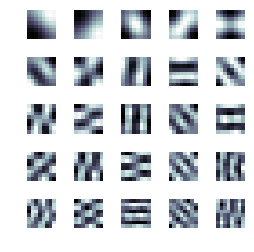

In [6]:
#run the code (for grayscale, color, etc.) that the algorithm is being applied to before running this chunk


pcatemp = sklearn.decomposition.PCA(n_components=25)
pcafit = pcatemp.fit(np.transpose(patches_mat))

print('Quality of image representation using only 40% as much data per patch',
      '\n(using only responses along these 25 components instead of the full 64 dimensions):',
      '\n',np.sum(100*pcafit.explained_variance_ratio_),'%')

print('\nPercentage of data explained by each filter:\n',100*pcafit.explained_variance_ratio_)

pca_comp = pcafit.components_
show_patches_mat(np.transpose(pca_comp), 25)

#  Part Three: Examples vs. Non-examples

# Natural vs. Unnatural

In [6]:
#The following code is the same code as above but it is using unnatural grayscale images

def collect_natural_patches(num_patches = 100000, patch_width = 8):
  """ collects image patches
  the natural images are from a specific folder of 13 .tiff files"""

  max_tries = num_patches * 50
  image_width = 200
  
  img_first_patch = 0 # the first patch number accepted from an image
  img_first_try = 0 # the first attempt to take a patch from the image
  patch_cnt = 0 # number of collected patches
  try_cnt = 0 # number of attempted collected patches
  num_pixels = patch_width * patch_width

  patch_sample = np.zeros([patch_width,patch_width],float)
  patch = np.zeros([num_pixels,1],float)
  
  img_patches = np.zeros([num_pixels,num_patches],float)

  # change the image sampled from
  nat_img_cnt = 1  
  image = PIL.Image.open('unnatural_images_grayscale/' + str(nat_img_cnt) + '.tiff')
  image = image.convert('L')
  image = np.asarray(image, 'double').transpose()  

  # normalizing the image
  image -= image.mean()
  image /= image.std()
      
  # collect the patches
  while patch_cnt < num_patches and try_cnt < max_tries:
    try_cnt += 1  # number of total patches attempted

    if (try_cnt - img_first_try) > max_tries/5 or \
      (patch_cnt - img_first_patch) > num_patches/5:
      # change the image sampled from
      nat_img_cnt += 1
      image = PIL.Image.open('unnatural_images_grayscale/' + str(nat_img_cnt) + '.tiff')
      image = np.asarray(image, 'double').transpose()        
      # normalizing the image
      image -= image.mean()
      image /= image.std()
      
      img_first_patch = patch_cnt
      img_first_try = try_cnt
    
      # update on every switch of images
      print (int(100 * float(patch_cnt)/num_patches),' percent complete')
    
    px = np.random.randint(0,image_width - patch_width)
    py = np.random.randint(0,image_width - patch_width)
        
    patch_sample = image[px:px+patch_width,py:py+patch_width].copy()
    patch_std = patch_sample.std()
    
    if patch_std > 0.0: # > 0 to remove blank/uninteresting patches for speed
      # create the patch vector     
      patch = np.reshape(patch_sample, num_pixels)     
      patch = patch - np.mean(patch)         
      img_patches[:,patch_cnt] = patch.copy()
      patch_cnt += 1
  return img_patches
        
patches_mat = collect_natural_patches(num_patches = 100000, patch_width = 8)
print('\nshape of the extracted image patch data:', patches_mat.shape)

20  percent complete


C:\Users\Zach Barrett\Anaconda3\lib\site-packages\numpy\core\_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\Zach Barrett\Anaconda3\lib\site-packages\numpy\core\_methods.py:105: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
C:\Users\Zach Barrett\Anaconda3\lib\site-packages\numpy\core\_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


ValueError: cannot reshape array of size 2048 into shape (64,)

In [ ]:
def show_patches_mat(pre_patches, show_patch_num = 16, display=True):
  """ this function generates a 2D array to display image patches (assuming square) """
  
  patches = pre_patches
    
  tot_patches = patches.shape[1]
  data_dim = patches.shape[0]
  patch_width = int(np.round(np.sqrt(data_dim)))
  
  # extract show_patch_num patches
  disp_patch = np.zeros([data_dim, show_patch_num], float)
  for i in range(0,show_patch_num):
    patch_i = i * tot_patches // show_patch_num
  
    patch = patches[:,patch_i].copy()
    pmax  = patch.max()
    pmin = patch.min()
    # fix patch range from min to max to 0 to 1
    if pmax > pmin: 
      patch = (patch - pmin) / (pmax - pmin)
    disp_patch[:,i] = patch.copy()

  bw = 5    # border width
  pw = patch_width
  
  patches_y = int(np.sqrt(show_patch_num))
  patches_x = int(np.ceil(float(show_patch_num) / patches_y))
  patch_img = disp_patch.max() * np.ones([(pw + bw) * patches_x - bw,
    patches_y * (pw + bw) - bw], float)
  for i in range(0,show_patch_num): 
    y_i = i // patches_y
    x_i = i % patches_y

    reshaped = disp_patch[:,i].reshape((pw,pw))
    full_patch = np.zeros([pw, pw], float)
    full_patch[0:pw,:] = reshaped[:,:].copy()
    patch_img[x_i*(pw+bw):x_i*(pw+bw)+pw,y_i*(pw+bw):y_i*(pw+bw)+pw] = full_patch
  
  if display:
    py.bone()
    py.imshow(patch_img.T, interpolation='nearest')
    py.axis('off')
  return

show_patches_mat(patches_mat)

In [ ]:
#ICA Algorithm

pcatemp = sklearn.decomposition.PCA(n_components=25)
pcafit = pcatemp.fit(np.transpose(patches_mat))

print('Quality of image representation using only 40% as much data per patch',
      '\n(using only responses along these 25 components instead of the full 64 dimensions):',
      '\n',np.sum(100*pcafit.explained_variance_ratio_),'%')

print('\nPercentage of data explained by each filter:\n',100*pcafit.explained_variance_ratio_)

pca_comp = pcafit.components_
show_patches_mat(np.transpose(pca_comp), 25)